# Classificação de galáxias

* Determição do tipo de galáxia
* Dados obtidos na NASA (https://heasarc.gsfc.nasa.gov/db-perl/W3Browse/w3table.pl?tablehead=name%3Dneargalcat&Action=More+Options)

* Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* Lendo arquivo Excel

In [2]:
dados = pd.read_excel('galaxias.xls',sheet_name='neargalcat')

*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'


* Exibindo cinco primeiras linhas

In [3]:
dados.head()

,name,ra,dec,bmag,ks_mag,linear_diameter,distance,radial_velocity,abs_bmag,class
0,ESO006-001,124.8471,-85.1456,15.13,12.97,2.55,6.70,738.0,-14.8,SPIRAL GALAXY
1,IC3104,184.6921,-79.7261,13.65,9.26,3.44,2.27,429.0,-14.8,SPIRAL GALAXY
2,HIPASS J1247-77,191.8858,-77.5836,18.00,13.50,1.18,3.16,413.0,-12.7,IRREGULAR GALAXY
3,NGC2915,141.5479,-76.6264,13.20,9.70,2.77,3.78,467.0,-16.1,SPIRAL GALAXY
4,[KK2000] 03,36.1779,-73.5128,16.00,10.83,3.01,4.10,NaN,-12.3,LENTICULAR GALAXY


* Verificando quantidade de galáxias para cada tipo

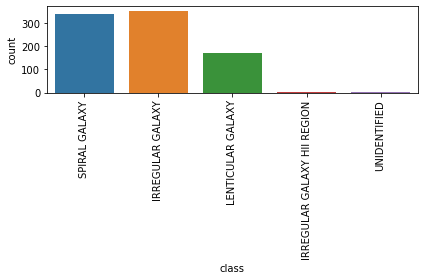

In [4]:
sns.countplot(x=dados['class'])
plt.xticks(rotation=90)
plt.tight_layout()

* Renomeando classes para uma forma mais geral

In [5]:
def fix_classe(x):
    if(x=="IRREGULAR GALAXY"):
        return "Irregular"
    elif(x=="SPIRAL GALAXY"):
         return "Espiral"
    elif(x=="LENTICULAR GALAXY"):
         return "Lenticular"
    elif(x=="IRREGULAR GALAXY HII REGION"):
         return "Irregular"
    else:
         return x

In [6]:
dados['class'] = dados['class'].apply(fix_classe)

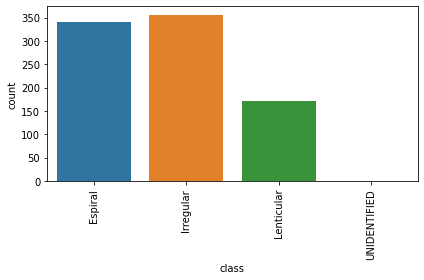

In [7]:
sns.countplot(x=dados['class'])
plt.xticks(rotation=90)
plt.tight_layout()

* Removendo galáxias sem classe definida

In [8]:
dados = dados[dados['class']!="UNIDENTIFIED"]

In [9]:
dados.head()

,name,ra,dec,bmag,ks_mag,linear_diameter,distance,radial_velocity,abs_bmag,class
0,ESO006-001,124.8471,-85.1456,15.13,12.97,2.55,6.70,738.0,-14.8,Espiral
1,IC3104,184.6921,-79.7261,13.65,9.26,3.44,2.27,429.0,-14.8,Espiral
2,HIPASS J1247-77,191.8858,-77.5836,18.00,13.50,1.18,3.16,413.0,-12.7,Irregular
3,NGC2915,141.5479,-76.6264,13.20,9.70,2.77,3.78,467.0,-16.1,Espiral
4,[KK2000] 03,36.1779,-73.5128,16.00,10.83,3.01,4.10,NaN,-12.3,Lenticular


* Exibindo informações dos dados

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 0 to 868
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             868 non-null    object 
 1   ra               868 non-null    float64
 2   dec              868 non-null    float64
 3   bmag             863 non-null    float64
 4   ks_mag           862 non-null    float64
 5   linear_diameter  861 non-null    float64
 6   distance         868 non-null    float64
 7   radial_velocity  760 non-null    float64
 8   abs_bmag         863 non-null    float64
 9   class            868 non-null    object 
dtypes: float64(8), object(2)
memory usage: 74.6+ KB


* Verificando existência de NaNs

In [11]:
dados.isna().sum()

name                 0
ra                   0
dec                  0
bmag                 5
ks_mag               6
linear_diameter      7
distance             0
radial_velocity    108
abs_bmag             5
class                0
dtype: int64

* Removendo linhas das colunas com menos elementos vazios

In [12]:
dados = dados.dropna(subset=['bmag','ks_mag','linear_diameter','abs_bmag'])

In [13]:
dados.isna().sum()

name                 0
ra                   0
dec                  0
bmag                 0
ks_mag               0
linear_diameter      0
distance             0
radial_velocity    108
abs_bmag             0
class                0
dtype: int64

* Separando cada grupo de galáxias num dataframe

In [14]:
irregular = dados[dados['class']=='Irregular']
lenticular = dados[dados['class']=='Lenticular']
espiral = dados[dados['class']=='Espiral']

* Verificando existência de NaNs nas irregulares e substituindo pela mediana

In [15]:
irregular.isna().sum()

name                0
ra                  0
dec                 0
bmag                0
ks_mag              0
linear_diameter     0
distance            0
radial_velocity    31
abs_bmag            0
class               0
dtype: int64

In [16]:
irregular['radial_velocity'] = irregular['radial_velocity'].fillna(irregular['radial_velocity'].mean())

<ipython-input-16-46fd05ba8252>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irregular['radial_velocity'] = irregular['radial_velocity'].fillna(irregular['radial_velocity'].mean())


* Verificando existência de NaNs nas lenticulares e substituindo pela mediana

In [17]:
lenticular.isna().sum()

name                0
ra                  0
dec                 0
bmag                0
ks_mag              0
linear_diameter     0
distance            0
radial_velocity    77
abs_bmag            0
class               0
dtype: int64

In [18]:
lenticular['radial_velocity'] = lenticular['radial_velocity'].fillna(lenticular['radial_velocity'].mean())

<ipython-input-18-e8ad1879e9d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lenticular['radial_velocity'] = lenticular['radial_velocity'].fillna(lenticular['radial_velocity'].mean())


* Verificando existência de NaNs nas espirais e substituindo pela mediana

In [19]:
espiral['radial_velocity'] = espiral['radial_velocity'].fillna(espiral['radial_velocity'].mean())

<ipython-input-19-2d8240883313>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  espiral['radial_velocity'] = espiral['radial_velocity'].fillna(espiral['radial_velocity'].mean())


* Juntando dataframes

In [20]:
dados = pd.concat([espiral,lenticular,irregular])

In [21]:
dados.head()

,name,ra,dec,bmag,ks_mag,linear_diameter,distance,radial_velocity,abs_bmag,class
0,ESO006-001,124.8471,-85.1456,15.13,12.97,2.55,6.70,738.0,-14.8,Espiral
1,IC3104,184.6921,-79.7261,13.65,9.26,3.44,2.27,429.0,-14.8,Espiral
3,NGC2915,141.5479,-76.6264,13.20,9.70,2.77,3.78,467.0,-16.1,Espiral
5,SMC,13.1583,-72.8003,2.70,0.16,7.09,0.06,158.0,-16.5,Espiral
6,LMC,80.8942,-69.7561,0.91,-1.75,10.06,0.05,278.0,-17.9,Espiral


In [22]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 868
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             861 non-null    object 
 1   ra               861 non-null    float64
 2   dec              861 non-null    float64
 3   bmag             861 non-null    float64
 4   ks_mag           861 non-null    float64
 5   linear_diameter  861 non-null    float64
 6   distance         861 non-null    float64
 7   radial_velocity  861 non-null    float64
 8   abs_bmag         861 non-null    float64
 9   class            861 non-null    object 
dtypes: float64(8), object(2)
memory usage: 74.0+ KB


* Analisando posição dos objetos

/home/usuario/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(26.045026765046295, 0.5, 'Declinação (graus)')

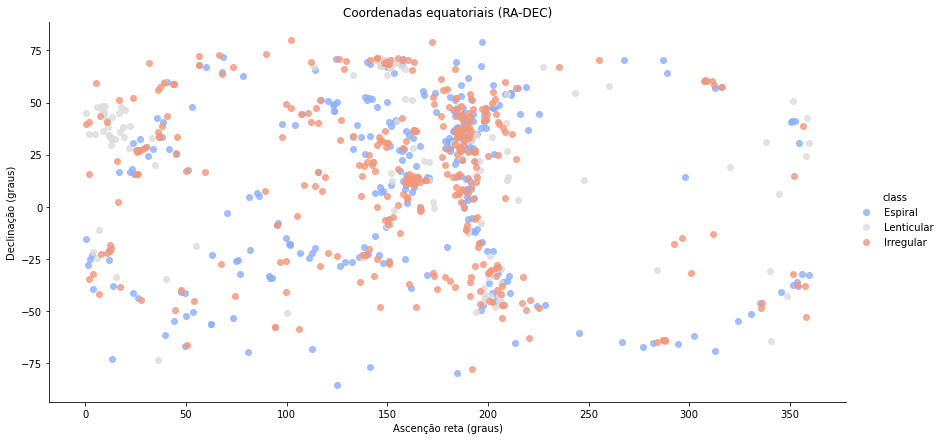

In [23]:
sns.lmplot(x='ra', y='dec', data=dados, hue='class', fit_reg=False, palette='coolwarm', size=6, aspect=2)
plt.title('Coordenadas equatoriais (RA-DEC)')
plt.xlabel('Ascenção reta (graus)')
plt.ylabel('Declinação (graus)')

* Conforme esperado objetos não estão numa posição preferencial

* Removendo colunas name, ra e dec do dataframe

In [24]:
dados = dados.drop(['name','ra','dec'],axis=1)

In [25]:
dados.head()

,bmag,ks_mag,linear_diameter,distance,radial_velocity,abs_bmag,class
0,15.13,12.97,2.55,6.70,738.0,-14.8,Espiral
1,13.65,9.26,3.44,2.27,429.0,-14.8,Espiral
3,13.20,9.70,2.77,3.78,467.0,-16.1,Espiral
5,2.70,0.16,7.09,0.06,158.0,-16.5,Espiral
6,0.91,-1.75,10.06,0.05,278.0,-17.9,Espiral


* Analisando distribuição das variáveis 

AttributeError: module 'seaborn' has no attribute 'histplot'

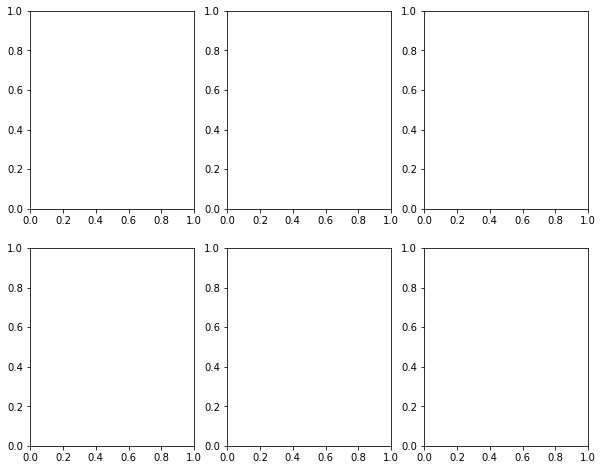

In [26]:
fig, ax = plt.subplots(2,3,figsize=(10,8))
sns.histplot(data=dados,x='bmag',hue='class',ax=ax[0][0])
sns.histplot(data=dados,x='ks_mag',hue='class',ax=ax[0][1])
sns.histplot(data=dados,x='linear_diameter',hue='class',ax=ax[0][2])

sns.histplot(data=dados,x='distance',hue='class',ax=ax[1][0])
sns.histplot(data=dados,x='radial_velocity',hue='class',ax=ax[1][1])
sns.histplot(data=dados,x='abs_bmag',hue='class',ax=ax[1][2])
plt.tight_layout()

* Analisando outliers

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(10,8))
sns.boxplot(data=dados,y='bmag',x='class',ax=ax[0][0])
sns.boxplot(data=dados,y='ks_mag',x='class',ax=ax[0][1])
sns.boxplot(data=dados,y='linear_diameter',x='class',ax=ax[0][2])

sns.boxplot(data=dados,y='distance',x='class',ax=ax[1][0])
sns.boxplot(data=dados,y='radial_velocity',x='class',ax=ax[1][1])
sns.boxplot(data=dados,y='abs_bmag',x='class',ax=ax[1][2])
plt.tight_layout()

* Convertendo variável classe para numérica

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
dados['class'] = le.fit_transform(dados['class'].values)

In [ ]:
dados.head()

* Determinando variáveis X e Y

In [ ]:
X = dados.drop('class',axis=1).values
Y = dados['class'].values

* Criando amostras de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y,test_size=0.3,random_state=42)

* Importando métricas de classificação

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
modelos = []
acuracia = []
precisao = []
recall = []
f1 = []

* Modelo 1: Regressão logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_treino,Y_treino)

In [ ]:
Y_pred_logreg = logreg.predict(X_teste)

In [ ]:
acc_logreg = accuracy_score(Y_teste,Y_pred_logreg)
prec_logreg = precision_score(Y_teste,Y_pred_logreg,average='macro')
rec_logreg = recall_score(Y_teste,Y_pred_logreg,average='macro')
f1_logreg = f1_score(Y_teste,Y_pred_logreg,average='macro')

In [ ]:
print("Acurácia = {:0.2f}%".format(acc_logreg*100))
print("Precisão = {:0.2f}%".format(prec_logreg*100))
print("Recall = {:0.2f}%".format(rec_logreg*100))
print("F1 = {:0.2f}%".format(f1_logreg*100))

In [ ]:
modelos.append("Regressão logistica")
acuracia.append(acc_logreg)
precisao.append(prec_logreg)
recall.append(rec_logreg)
f1.append(f1_logreg)

* Modelo 2: Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_treino,Y_treino)

In [ ]:
Y_pred_svc = svc.predict(X_teste)

In [ ]:
acc_svc = accuracy_score(Y_teste,Y_pred_svc)
prec_svc = precision_score(Y_teste,Y_pred_svc,average='macro')
rec_svc = recall_score(Y_teste,Y_pred_svc,average='macro')
f1_svc = f1_score(Y_teste,Y_pred_svc,average='macro')

In [ ]:
print("Acurácia = {:0.2f}%".format(acc_svc*100))
print("Precisão = {:0.2f}%".format(prec_svc*100))
print("Recall = {:0.2f}%".format(rec_svc*100))
print("F1 = {:0.2f}%".format(f1_svc*100))

In [ ]:
modelos.append("SVC")
acuracia.append(acc_svc)
precisao.append(prec_svc)
recall.append(rec_svc)
f1.append(f1_svc)

* Modelo 3: Naive-Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_treino,Y_treino)

In [ ]:
Y_pred_nb = nb.predict(X_teste)

In [ ]:
acc_nb = accuracy_score(Y_teste,Y_pred_nb)
prec_nb = precision_score(Y_teste,Y_pred_nb,average='macro')
rec_nb = recall_score(Y_teste,Y_pred_nb,average='macro')
f1_nb = f1_score(Y_teste,Y_pred_nb,average='macro')

In [ ]:
print("Acurácia = {:0.2f}%".format(acc_nb*100))
print("Precisão = {:0.2f}%".format(prec_nb*100))
print("Recall = {:0.2f}%".format(rec_nb*100))
print("F1 = {:0.2f}%".format(f1_nb*100))

In [ ]:
modelos.append("Naive-Bayes")
acuracia.append(acc_nb)
precisao.append(prec_nb)
recall.append(rec_nb)
f1.append(f1_nb)

* Modelo 4: Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_treino,Y_treino)

In [ ]:
Y_pred_dtc = dtc.predict(X_teste)

In [ ]:
acc_dtc = accuracy_score(Y_teste,Y_pred_dtc)
prec_dtc = precision_score(Y_teste,Y_pred_dtc,average='macro')
rec_dtc = recall_score(Y_teste,Y_pred_dtc,average='macro')
f1_dtc = f1_score(Y_teste,Y_pred_dtc,average='macro')

In [ ]:
print("Acurácia = {:0.2f}%".format(acc_dtc*100))
print("Precisão = {:0.2f}%".format(prec_dtc*100))
print("Recall = {:0.2f}%".format(rec_dtc*100))
print("F1 = {:0.2f}%".format(f1_dtc*100))

In [ ]:
modelos.append("Decision Tree")
acuracia.append(acc_dtc)
precisao.append(prec_dtc)
recall.append(rec_dtc)
f1.append(f1_dtc)

* Modelo 5: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_treino,Y_treino)

In [ ]:
Y_pred_rfc = rfc.predict(X_teste)

In [ ]:
acc_rfc = accuracy_score(Y_teste,Y_pred_rfc)
prec_rfc = precision_score(Y_teste,Y_pred_rfc,average='macro')
rec_rfc = recall_score(Y_teste,Y_pred_rfc,average='macro')
f1_rfc = f1_score(Y_teste,Y_pred_rfc,average='macro')

In [ ]:
print("Acurácia = {:0.2f}%".format(acc_rfc*100))
print("Precisão = {:0.2f}%".format(prec_rfc*100))
print("Recall = {:0.2f}%".format(rec_rfc*100))
print("F1 = {:0.2f}%".format(f1_rfc*100))

In [ ]:
modelos.append("Random Forest")
acuracia.append(acc_rfc)
precisao.append(prec_rfc)
recall.append(rec_rfc)
f1.append(f1_rfc)

* Dataframe com resultados

In [ ]:
dicionario = {"Modelo" : modelos, "Acuracia" : acuracia, "Precisao" : precisao,
             "Recall" : recall, "F1" : f1}

In [ ]:
pd_di = pd.DataFrame(dicionario)

In [ ]:
pd_di

* Determinando melhor modelo

In [ ]:
pd_di = pd_di.sort_values(by='Recall',ascending=False)

In [ ]:
pd_di

* Random Forest se mostrou o melhor modelo